<h1>Forward Pass on a four pixel (2x2) image<h1>

<h1>Tensors</h1> 

Tensors are just n dimensional arrays, just like in NumPy or matrices in linear algebra.
We can perform all sorts of mathematical operations on tensors, like matrix multiplication, transposing, etc.


Anything that can be represented as a tensor is a good candidate to be the input of a neural net. 

For our very first neural network that we're going to build from scratch we'll create classifier that is able to distinguing between 4 different types of images (our images will be <b>very</b> small)


In [2]:
# Import torch and a few submodules for convinience
import torch
import torch.nn as nn
import torch.nn.functional as F

# Import numpy for converting torch tensors to arrays that can be displayed
import numpy as np

# Import pyplot to plot things
from matplotlib import pyplot as plt


In [3]:
# Create a couple of tensors
A = [[1, 2, 1],[0, 1, 0],[2, 3, 4]]
tensor_A = torch.tensor(A)

A = [[2, 5, 1],[6, 7, 1],[1, 8, 1]]
tensor_B = torch.tensor(A)

In [4]:
# Element Wise Multiplication
print(tensor_A * tensor_B)

tensor([[ 2, 10,  1],
        [ 0,  7,  0],
        [ 2, 24,  4]])


In [5]:
# Matrix Multiplication (Dot product)
print(tensor_A @ tensor_B)

tensor([[15, 27,  4],
        [ 6,  7,  1],
        [26, 63,  9]])


In [6]:
image = np.array(tensor_A)

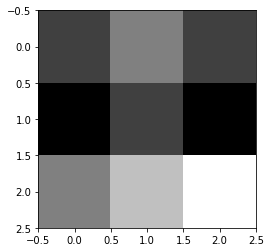

In [7]:
plt.imshow(image, cmap='gray')
plt.show()

<h1> Image classifier </h1>
    
 We'll start with a 2 layer fully connected network that can classify between solid, vertical, diagonal and horizontal images. 
 
 <img src="imgs/network.jpg">
 
 <br> Bellow is a sample input image.

In [1]:
# Create our input image
image_array = [[-1, -1], 
               [1, 1]]

image_array = [[.5, 0], 
               [.75, -.75]]


# Make it into a tensor
image_tensor = torch.Tensor(image_array)
plt.imshow(image_array, cmap='gray', vmin=-1, vmax=1)
plt.show()

NameError: name 'torch' is not defined

For this example will be using a Fully Connected (FC) Layer. An FC layer is called Linear in PyTorch.
To take advantage of a FC layer we must first display our image as a vector. Note that the simplest form of a FC layer is a single neuron.

<img src="./imgs/input_vector.jpg">

In [8]:
# Flatten the image
x0 = torch.flatten(image_tensor)

print(x0)

tensor([ 0.5000,  0.0000,  0.7500, -0.7500])


Now that we've flattened our image. Let's use it as input to a single neuron. Our example neuron takes a weighted sum of our input.

<img src="./imgs/neuron.jpg">

In [9]:
# Fully Connected Layer
# with 4 inputs and 1 output
fc0 = nn.Linear(4, 1, bias = False)

# Layers are usualy randomly initialized but for this example we will hard code the weights
fc0.weight.data = torch.Tensor([-.2, 0, -.5, .8])

# We can also represent a neuron or a fully connected layer as an array
A = [-.2, 0, -.5, .8]

# Applying the function fc0 to x yields the same result as the matrix multiplicaiton of x and A
x1 = fc0(x0)
print(x1)
print(np.array(x0) @ A)


tensor(-1.0750, grad_fn=<DotBackward>)
-1.0750000000000002


# Activation Function

We often simplify our tensors by constraning them to a range.
<img src="imgs/sigmoid.jpg">

In [10]:
torch.tanh(x1)

tensor(-0.7913, grad_fn=<TanhBackward>)

To summerize what we've done so far:
- Take an input image and flatten it into a vector
- Define a neuron with hardcoded weights
- Feed our input vector to the neuron
- Pass the output of the neuron through a squashing function

Believe it or not, we have all (most) of the components we need to create a full neural network. Now we'll scale up from a single neuron to 2 FC layers with 4 neurons each.

Our first fully connected layer will consist of 4 neurons that activate when a certain combination of pixels is encountered in the input image.

<img src="./imgs/fc1.jpg">

In [11]:
fc1 = nn.Linear(4, 4, bias = False)
fc1.weight.data = torch.Tensor([[1, 0, 1, 0],
                                [0, 1, 0, 1],
                                [1, 0, -1, 0],
                                [0, 1, 0, -1],])
print(fc1.weight)


Parameter containing:
tensor([[ 1.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.],
        [ 1.,  0., -1.,  0.],
        [ 0.,  1.,  0., -1.]], requires_grad=True)


In [19]:
# Pass through sigmoid activation function
x1 = torch.sigmoid(x1)
x1

tensor(0.2545, grad_fn=<SigmoidBackward>)

<img src="./imgs/fc2.jpg">

In [21]:
print(x1)
fc2 = nn.Linear(4, 4, bias = False)
fc2.weight.data = torch.Tensor([[1, 1, 1, 1],
                                [-1, 1, -1, 1],
                                [1, -1, -1, 1],
                                [1, 1, -1, -1],])

print(fc2.weight)
x1 = fc1(x0)
x2 = fc2(x1)

print(x1)
print(x2)

tensor([ 1.2500, -0.7500, -0.2500,  0.7500], grad_fn=<SqueezeBackward3>)
Parameter containing:
tensor([[ 1.,  1.,  1.,  1.],
        [-1.,  1., -1.,  1.],
        [ 1., -1., -1.,  1.],
        [ 1.,  1., -1., -1.]], requires_grad=True)
tensor([ 1.2500, -0.7500, -0.2500,  0.7500], grad_fn=<SqueezeBackward3>)
tensor([ 1., -1.,  3.,  0.], grad_fn=<SqueezeBackward3>)


In [ ]:
torch.sigmoid(x2)
torch.relu(x2)

x2

# Forward Pass

In [36]:
x = torch.Tensor([[-1, -1], 
                   [1, 1]])
x = torch.flatten(x)

fc1 = nn.Linear(4, 4, bias = False)
fc1.weight.data = torch.Tensor([[1, 0, 1, 0],
                                [0, 1, 0, 1],
                                [1, 0, -1, 0],
                                [0, 1, 0, -1],])
print(fc1.weight)
x = fc1(x)
x = torch.tanh(x)
x

Parameter containing:
tensor([[ 1.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.],
        [ 1.,  0., -1.,  0.],
        [ 0.,  1.,  0., -1.]], requires_grad=True)


tensor([ 0.0000,  0.0000, -0.9640, -0.9640], grad_fn=<TanhBackward>)

In [37]:
fc2 = nn.Linear(4, 4, bias = False)
fc2.weight.data = torch.Tensor([[1, 1, 0, 0],
                                [-1, 1, 0, 0],
                                [0, 0, 1, -1],
                                [0, 0, 1, 1]])

# Weights might be wrong
print(fc2.weight)

x = fc2(x)
x = torch.tanh(x)
x

Parameter containing:
tensor([[ 1.,  1.,  0.,  0.],
        [-1.,  1.,  0.,  0.],
        [ 0.,  0.,  1., -1.],
        [ 0.,  0.,  1.,  1.]], requires_grad=True)


tensor([ 0.0000,  0.0000,  0.0000, -0.9586], grad_fn=<TanhBackward>)

In [18]:
# Output Layer
fc3 = nn.Linear(4, 8, bias = False)
fc3.weight.data = torch.Tensor([[1, 0, 0, 0],
                                [-1, 0, 0, 0],
                                [0, 1, 0, 0],
                                [0, -1, 0, 0],
                                [0, 0, 1, 0],
                                [0, 0, -1, 0],
                                [0, 0, 0, 1],
                                [0, 0, 0, -1]])

x = fc3(x)
x = F.relu(x)
x

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9586],
       grad_fn=<ReluBackward0>)

In [38]:
def forward(x):
    
    # Flatten
    x = torch.flatten(x)
    
    # Define fc1
    fc1 = nn.Linear(4, 4, bias = False)
    fc1.weight.data = torch.Tensor([[1, 0, 1, 0],
                                    [0, 1, 0, 1],
                                    [1, 0, -1, 0],
                                    [0, 1, 0, -1],])
    # Apply fc1
    x = fc1(x)
    # Apply activation function to output of fc1
    x = torch.tanh(x)
    
    # Define fc2
    fc2 = nn.Linear(4, 4, bias = False)
    fc2.weight.data = torch.Tensor([[1, 1, 0, 0],
                                    [-1, 1, 0, 0],
                                    [0, 0, 1, -1],
                                    [0, 0, 1, 1]])
    # Apply fc2
    x = fc2(x)
    # Apply activation function to output of fc2
    x = torch.tanh(x)
    xfc2 = x
    
    # Output layer
    fc3 = nn.Linear(4, 8, bias = False)
    fc3.weight.data = torch.Tensor([[1, 0, 0, 0],
                                    [-1, 0, 0, 0],
                                    [0, 1, 0, 0],
                                    [0, -1, 0, 0],
                                    [0, 0, 1, 0],
                                    [0, 0, -1, 0],
                                    [0, 0, 0, 1],
                                    [0, 0, 0, -1]])

    x = fc3(x)
    x = F.relu(x)
    
    return x, xfc2
    

In [39]:
def label_map(x):
    
    cls = list(x).index(max(x))
    
    if cls == 0 or cls == 1:
        return "solid"
    if cls == 2 or cls == 3:
        return "vertical"
    if cls == 4 or cls == 5:
        return "diagonal"
    if cls == 6 or cls ==7:
        return "horizontal"

In [40]:

#tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9586],

output_L = nn.Linear(4, 8, bias = False)
output_L.weight.data = torch.Tensor([[1, 0, 0, 0, 0, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 0, 0]])


tensor([ 0.0000,  0.0000,  0.0000, -0.9586], grad_fn=<TanhBackward>)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x4 and 8x8)

In [42]:
x = [[-1, 1], 
     [1, -1]]
x = torch.Tensor(x)
x = forward(x)
label_map(np.array(x.detach()))

AttributeError: 'tuple' object has no attribute 'detach'